In [98]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import expon

In [99]:
def simulate_hat_game(i):
    papers = list(range(1, i + 1))
    while len(papers) > 1:
        a, b = random.sample(papers, 2)
        papers.remove(a)
        papers.remove(b)
        papers.append(abs(a - b))
    return papers[0]

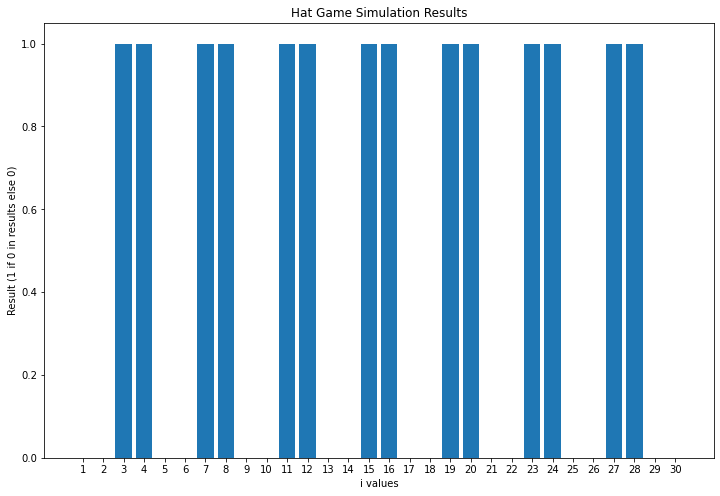

In [100]:
i_values = range(1, 31)
num_trials = 30
results_list = []

for i in i_values:
    results = [simulate_hat_game(i) for _ in range(num_trials)]
    result_indicator = 1 if 0 in results else 0
    results_list.append(result_indicator)

plt.figure(figsize=(12, 8))
plt.bar(range(1, len(results_list) + 1), results_list, tick_label = list(i_values))
plt.xlabel('i values')
plt.ylabel('Result (1 if 0 in results else 0)')
plt.title('Hat Game Simulation Results')
plt.show()

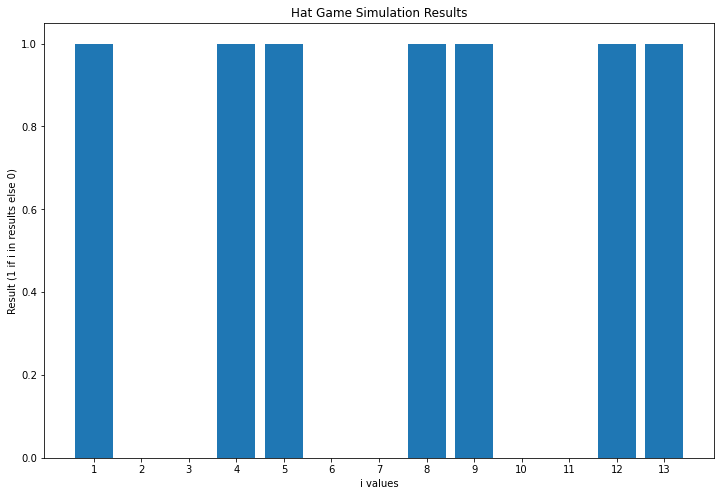

In [122]:
i_values = range(1, 14)
num_trials = 1000
results_list = []

for i in i_values:
    results = [simulate_hat_game(i) for _ in range(num_trials)]
    result_indicator = 1 if i in results else 0
    results_list.append(result_indicator)

plt.figure(figsize=(12, 8))
plt.bar(range(1, len(results_list) + 1), results_list, tick_label=list(i_values))
plt.xlabel('i values')
plt.ylabel('Result (1 if i in results else 0)')
plt.title('Hat Game Simulation Results')
plt.show()

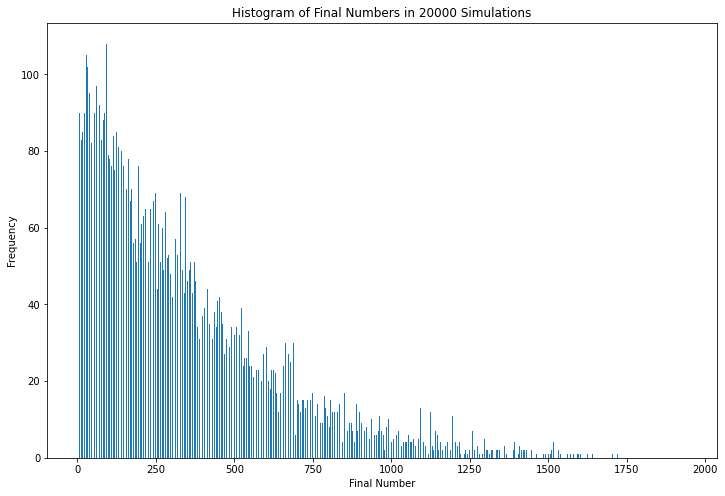

In [102]:
def simulate_hat_game_n_times(i, n):
    results = []
    for _ in range(n):
        result = simulate_hat_game(i)
        results.append(result)
    return results

n_simulations = 20000
final_numbers = simulate_hat_game_n_times(2024, n_simulations)

plt.figure(figsize = (12, 8))
plt.hist(final_numbers, bins = range(1, max(final_numbers) + 1))
plt.title(f'Histogram of Final Numbers in {n_simulations} Simulations')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.show()

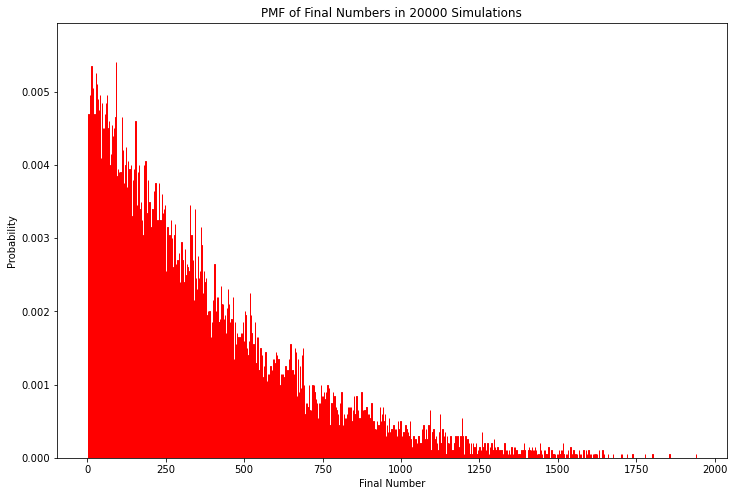

In [119]:
frequencies = [final_numbers.count(x) for x in range(1, max(final_numbers) + 1)]
probabilities = [freq / n_simulations for freq in frequencies]

plt.figure(figsize=(12, 8))
plt.bar(range(1, max_final_number + 1), probabilities, width=1.0, edgecolor = 'red')
plt.title(f'PMF of Final Numbers in {n_simulations} Simulations')
plt.xlabel('Final Number')
plt.ylabel('Probability')
plt.ylim(0, max(probabilities) * 1.1)
plt.show()

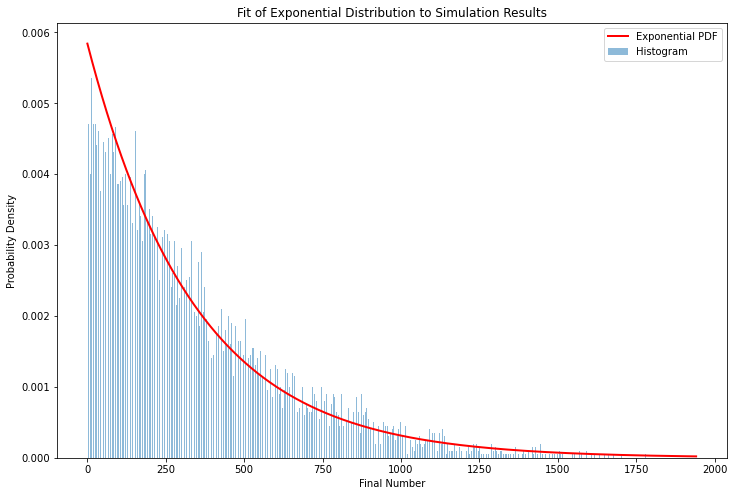

In [121]:
x_values = np.linspace(1, max(final_numbers), 1000)
pdf_values = 2 * (expon.pdf(x_values, scale = np.mean(final_numbers)))

plt.figure(figsize=(12, 8))
plt.hist(final_numbers, bins=range(1, max(final_numbers) + 1), density=True, alpha=0.5, label='Histogram')
plt.plot(x_values, pdf_values, 'r-', lw=2, label='Exponential PDF')
plt.legend()
plt.title('Fit of Exponential Distribution to Simulation Results')
plt.xlabel('Final Number')
plt.ylabel('Probability Density')
plt.show()